# Lämpötila ja sademäärä

## Tehtävä

Etsi oman kotipaikkakuntasi (tai jonkin muun paikkakunnan) kuukausien keskilämpötilat ja sademäärät ainakin kymmenen viime vuoden ajalta (voit valita myös koko mittaushistorian). Laske vuosien keskilämpötilat ja sademäärät ja piirrä niistä kuvaaja. Mikä vuosi on ollut kaikkein lämpimin? Entä kylmin? Milloin puolestaan on satanut eniten tai vähiten? Voit ottaa mallia esimerkistä.

## Esimerkki

Haetaan [Ilmatieteenlaitoksen hakupalvelusta](https://www.ilmatieteenlaitos.fi/havaintojen-lataus) tiedot Pirkkalan lentoaseman säähavainnoista (kuukauden keskilämpötila ja -sademäärä). Mittaushistoria ulottuu noin 80-luvulle, joten valitaan aikaväliski 1980-2020. Havainnot on ladattu hakupalvelusta ja tallennettu tiedostoon "pirkkala_1980-2020.csv".

Käytetään datan lukemiseen ja käsittelemiseen [pandas](org)-pakettia ja datan visualisoimiseen [matplotlib](https://matplotlib.org/)-pakettia.

In [1]:
# Tuodaan tarvittavat paketit

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Luetaan data ja katsotaan ensimmäisten rivien sisältö.
# Data sijaitsee data kansiossa, joka on yhden kansion alempana nykyisestä kansiosta.

data = pd.read_csv('../data/pirkkala_1980-2020.csv')
data.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Kuukauden sadesumma (mm),Kuukauden keskilämpötila (degC)
0,1980,1,1,00:00,UTC,15.4,-9.5
1,1980,2,1,00:00,UTC,8.2,-10.1
2,1980,3,1,00:00,UTC,5.2,-6.5
3,1980,4,1,00:00,UTC,19.7,4.2
4,1980,5,1,00:00,UTC,22.9,7.3


Nähdään, että sademäärät löytyvät sarakkeesta "Kuukauden sadesumma (mm)" ja lämpötilat sarakkeesta "Kuukauden keskilämpötila (degC)". Seuraavaksi meidän tulee ryhmitellä data vuosien perusteella, jotta voimme vertailla dataa vuositasolla. Ryhmittely voidaan tehdä [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)-funktiolla.

In [3]:
# Ryhmitellään data "Vuosi"-sarakkeen perusteella.

data_groups = data.groupby('Vuosi')


Vuositilastojen keskiarvot saadaan [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html)-funktiolla.

In [4]:
# Katsotaan, miltä keskiarvotilastot näyttävät

avg = data_groups.mean()
avg.head()

,Kk,Pv,Kuukauden sadesumma (mm),Kuukauden keskilämpötila (degC)
Vuosi,,,,
1980,6.5,1.0,43.866667,3.308333
1981,6.5,1.0,67.708333,3.316667
1982,6.5,1.0,47.275000,4.041667
1983,6.5,1.0,51.150000,4.425000
1984,6.5,1.0,51.841667,4.600000


Tallennetaan keskiarvot omiin muuttujiin. Vuosiluvut saadaan data-ryhmistä [groups](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.groups.html)-komennolla, josta saamme ryhmät ja niitä vastaavien rivien indeksit. Koska haluamme ainoastaan vuosiluvut (eli ryhmien nimet), käytämme vielä `keys()`-funktiota, joka antaa ainoastaan ryhmien nimet.

In [5]:
# Tallennetaan vuosien keskilämpötilat ja -sademäärät sekä vuosiluvut omiin muuttujiin.

rain = avg['Kuukauden sadesumma (mm)']
temp = avg['Kuukauden keskilämpötila (degC)']
year = data_groups.groups.keys()

Nyt kun data on käsitelty, voimme piirtää kuvaajan. Piirretään sademäärä pylväinä ja lämpötila viivana. Käytetään matplotlib-paketista seuraavia funktioita:

- [`subplots()`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html) Kuvaajan alustus
- [`plot(x,y)`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) Piirretään y x:n funktiona
- [`bar(x,y)`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.bar.html) Pylväsdiagrammi 
- [`twinx()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.twinx.html) Luodaan toinen akselisto, jossa on sama x-akseli
- [`set_xlabel('title')`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) Asetetaan tiettyyn akselistoon x-akselin otsikko
- [`set_ylabel('title')`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html) Asetetaan tiettyyn akselistoon y-akselin otsikko
- [`title('title')`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) Otsikko
- [`show()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) Kuvaajan näyttäminen

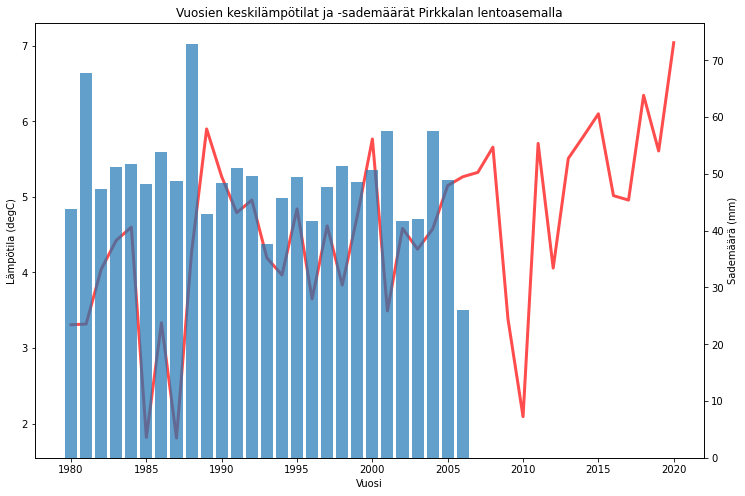

In [6]:
# Kuvaajan piirtäminen

# Alustetaan kuvaaja subplots-komennolla. Tällöin voimme luoda myöhemmin toisen y-akselin kuvaajaan.
fig, ax = plt.subplots(figsize=(12,8))

# Piirretään lämpötilat
ax.plot(year,temp, 'r', linewidth=3, alpha=0.7)

# Luodaan toinen y-akseli sademääriä varten
ax2 = ax.twinx()

# Piirretään sademäärät pylväinä
ax2.bar(year,rain, alpha=0.7)

# Asetetaan akselien otsikot
ax.set_xlabel('Vuosi')
ax.set_ylabel('Lämpötila (degC)')
ax2.set_ylabel('Sademäärä (mm)')

# Kuvaajan otsikko
plt.title('Vuosien keskilämpötilat ja -sademäärät Pirkkalan lentoasemalla')

# Näytetään kuvaaja
plt.show()

Kuvaajasta huomataan, että sademäärätiedot puuttuvat vuoden 2006 jälkeen. Tarkistetaan vielä [`get_group`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html)-funktion avulla, miltä vuoden 2006 tilastot näyttävät:

In [7]:
data_groups.get_group(2006)

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Kuukauden sadesumma (mm),Kuukauden keskilämpötila (degC)
312,2006,1,1,00:00,UTC,17.3,-5.5
313,2006,2,1,00:00,UTC,17.5,-9.6
314,2006,3,1,00:00,UTC,30.7,-7.9
315,2006,4,1,00:00,UTC,33.6,3.4
316,2006,5,1,00:00,UTC,36.2,9.9
317,2006,6,1,00:00,UTC,20.9,15.2
318,2006,7,1,00:00,UTC,NaN,17.9
319,2006,8,1,00:00,UTC,NaN,17.9
320,2006,9,1,00:00,UTC,NaN,12.7
321,2006,10,1,00:00,UTC,NaN,6.2


Huomataan, että sademäärien mittaaminen on keskeytetty kesken vuoden 2006. Niimpä meidän täytyy jättää myös vuosi 2006 pois vuositilastoistamme. Korvataan vuoden 2006 arvo NaN (Not a Number) arvolla, joka tarkoittaa, että arvoa ei ole olemassa. Tämä voidaan tehdä [numpy](https://numpy.org/)-paketin [`nan`](https://numpy.org/doc/stable/reference/constants.html#numpy.nan)-arvolla.

In [8]:
# Poistetaan vuosi 2006 rain-taulukosta
# Korvataan arvo numpy-paketin NaN-arvolla, joka tarkoittaa, että arvoa ei ole olemassa.

import numpy as np
rain[2006] = np.nan
rain

Vuosi
1980    43.866667
1981    67.708333
1982    47.275000
1983    51.150000
1984    51.841667
1985    48.183333
1986    53.908333
1987    48.833333
1988    72.958333
1989    42.900000
1990    48.425000
1991    51.091667
1992    49.666667
1993    37.700000
1994    45.791667
1995    49.508333
1996    41.641667
1997    47.716667
1998    51.375000
1999    48.666667
2000    50.700000
2001    57.633333
2002    41.691667
2003    42.025000
2004    57.550000
2005    48.983333
2006          NaN
2007          NaN
2008          NaN
2009          NaN
2010          NaN
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
Name: Kuukauden sadesumma (mm), dtype: float64

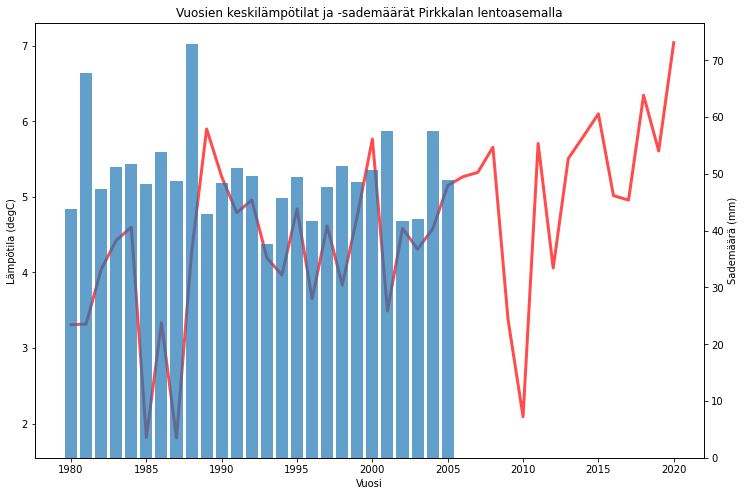

In [9]:
# Piirretään kuvaaja uudelleen

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(year,temp, 'r', linewidth=3, alpha=0.7)
ax2 = ax.twinx()
ax2.bar(year,rain, alpha=0.7)

ax.set_xlabel('Vuosi')
ax.set_ylabel('Lämpötila (degC)')
ax2.set_ylabel('Sademäärä (mm)')
plt.title('Vuosien keskilämpötilat ja -sademäärät Pirkkalan lentoasemalla')

plt.show()

Maksimi- ja minimi lämpötilat sekä sademäärät voitaisiin lukea suoraan kuvaajasta.

Ne voidaan kuitenkin saada myös koodaamalla (käytetään [`max()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html)- ja [`min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html#pandas.Series.min)-funktioita):

In [10]:
max_temp = temp[temp == temp.max()]
max_temp

Vuosi
2020    7.041667
Name: Kuukauden keskilämpötila (degC), dtype: float64

In [11]:
min_temp = temp[temp == temp.min()]
min_temp

Vuosi
1987    1.808333
Name: Kuukauden keskilämpötila (degC), dtype: float64

In [12]:
max_rain = rain[rain == rain.max()]
max_rain

Vuosi
1988    72.958333
Name: Kuukauden sadesumma (mm), dtype: float64

In [13]:
min_rain = rain[rain == rain.min()]
min_rain

Vuosi
1993    37.7
Name: Kuukauden sadesumma (mm), dtype: float64

Kokeile seuraavaksi itse selvittää esimerkiksi oman kotikaupunkisi lämpötilan ja sademäärän vuosittaiset keskiarvot. Voit piirtää myös tietyn vuoden kuukausittaiset keskiarvot!